# Exercise 6 - OOP

In this exercise, you get to familiarize yourself with strings, file handling, error handling and strings. This exercise covers 13-16



## 0. Unit conversion (\*)

Create a class for converting US units to the metric system. It should have the following **bound methods**:

```python
__init__ (self, value)

inch_to_cm(self)

foot_to_meters(self)

pound_to_kg(self)

__repr__(self)

```

Make sure that value is the correct type and format, raise suitable exceptions in case it isn't. Make value into **property** with getter and setter. Test your class manually by instantiating an object from it and test different methods. (\*)

---



In [1]:
class UnitConverter:
    def __init__(self, value: int | float):
        self.value = value
    
#    @property
#    def value(mesure):
#        return mesure
#        if not isinstance(mesure, (int|float)):
    
test1 = UnitConverter(302)
test1.value

302

## 1. Person (\*)

Create a class named Person, with **parameterized constructor** with the following parameters:

- name
- age
- email

Turn name, age, email into **properties** with following validations in their setters:

- name - must be string
- age - must be number between 0 and 125
- email - must include an @ sign

It should also have `__repr__` method to represent the Person class in a neat way.

Also create a method `say_hello()` that prints

```
Hi, my name is ..., I am ... years old, my email address is ...
```

---

## 2. Student and Teacher (\*)

Create two classes named Student and Teacher that inherits from Person.

The Student class shall have:

- study() method that prints out

```
study...study...study...more study
```

- override say_hello() with the following message:

```
Yo, I am a student, my name is ..., I am ... years old, my email address is ...
```

The Teacher class shall have:

- teach() method that prints out

```
teach...teach...teach...more teaching
```

Instantiate a Teacher object and a Student object. Call

- teach() and say_hello() methods from your Teacher object.
- study() and say_hello() methods from your Student object.

---



## 3. Plotting library (\*\*)

Create a class called `PlotAnnotator` which takes in a figure and axes instances and exposes a method called arrow, which serves the purpose of creating an annotation to a plot. Note that you might need other methods and/or properties, e.g. something that can return the figure instance.

Also add some settings so that you can reuse it for other plots. For simplicity you could have the settings directly in PlotAnnotator class, or if you'd like you could make use of inheritance or composition to separate concerns and make the classes have single responsibilities.

For example a manual test could look like this:

<img style="display:inline-block; text-align:left; max-width:40ch;" src="https://github.com/kokchun/assets/blob/main/python/annotator.png?raw=true" >



x[:5] = array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])
x[-5:] = array([ 9.5959596,  9.6969697,  9.7979798,  9.8989899, 10.       ])
x.shape = (100,)


Text(9, 10, 'Big dick here')

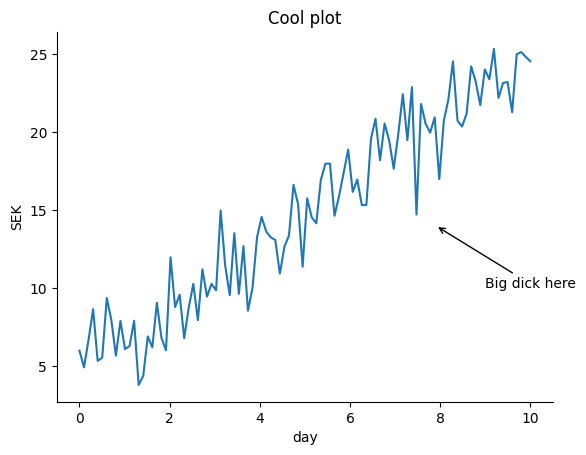

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class AnnotatePlot:
    pass

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

print(f"{x[:5] = }")
print(f"{x[-5:] = }")
print(f"{x.shape = }")

fig, ax = plt.subplots(1)

ax.plot(x, y)
ax.set(title="Cool plot", xlabel="day", ylabel="SEK")
ax.spines[["top","right"]].set_visible(False)
ax.annotate("Big dick here", xytext=(9,10),xy=(7.9,14),arrowprops={"arrowstyle": "->"})

## Refactor into a class

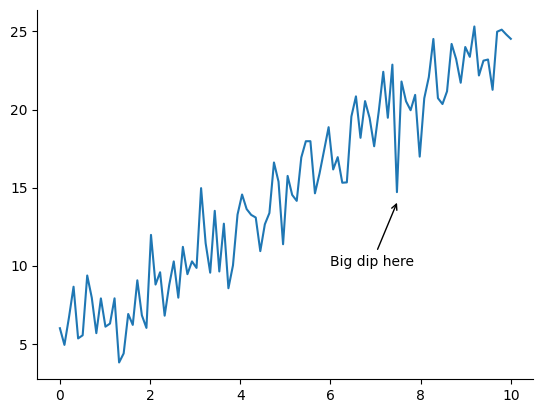

In [26]:
class AnnotatePlot:
    def __init__(self, fig, ax):
        self.ax = ax
        self.fig = fig

    def arrow(self, lable, start_xy, end_xy):
        self.ax.annotate(
            lable,
            xytext = start_xy,
            xy = end_xy,
            arrowprops={"arrowstyle": "->"}
        )
        return self

    def remove_clutter(self):
        self.ax.spines[["top","right"]].set_visible(False)
        return self

fig, ax = plt.subplots(1)

ax.plot(x, y)

annotator = AnnotatePlot(fig, ax)

annotator.arrow(lable="Big dip here",start_xy=(6,10),end_xy=(7.5,14.2)).remove_clutter()
        

In [ ]:
annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))

In [5]:
## 4. Video (\*)

Create classes following this UML:

<img src="https://github.com/kokchun/assets/blob/main/python/uml_video.png?raw=true" width="700"/>

Note that the method info() should be different in the different classes where it should be implemented.

Use the following code to test your program.

```python
pokemon = TV_serie("Pokemon", "Cartoon", 4.5, 550)
titanic = Movie("Titanic", "Romance", 4.7, 194)
code = Documentary("The Code", "Math", 4)

for video in tuple((pokemon, titanic, code)):
    print(video.info())
```

An example output could be:

```
TV series with title Pokemon, genre Cartoon, rating 4.5 and episodes 550

Movie with title Titanic, genre Romance, rating 4.7, duration 194 minutes

Video with title The Code, genre Math and rating 4
```

(\*)

## 5. Fraction (\*\*)

Create a class called Frac to represent mathematical fractions. The class is instantiated with two instance variables: nominator and denominator. Objects instantiated from this class should have methods for addition, subtraction, multiplication, division using the operators +,-,\*,/. Note that these implemented methods must be mathematically correct. Also implement the following methods:

```python

simplify(self, value = None) # simplifies to most simple form unless value is given

__str__(self) # represent the fraction in a neat way for printing

mixed(self) # represent the fraction in mixed terms

__eq__(self, other) # checks equality by overloading ==

```

Also remember to handle errors and validations.

Example of tests that it should handled:

- 1/2 + 1/3 = 5/6
- 1/2 - 1/3 = 1/6
- 7/6 --> 1 1/6 (mixed)
- 3\*1/2 = 3/2
- 1/2 \* 3 = 3/2
- 1/4 + 2 = 9/4
- 1/4 / 1/2 = 1/2
- 2/4 == 1/2 --> True
- 3/4 += 2 = 11/4

Add unit testing to this class

## 6. Simple Travian (\*\*)

[Travian][travian_game] is a strategy game where you collect resources (lumber, clay, iron, crop) to build up a city and spawn troops to pillage and attack other villages. Now we will use OOP to represent a very simple village. It shall have at least these features:

- 4 fields
  - 1 crop
  - 1 clay
  - 1 lumber
  - 1 iron
- Each field produces 4 units of that resource per hour. Just need to represent it, no need to count the time.
- Be able to add and subtract resources -> overload the plus and minus operators
- There shall be a max capacity of 800 for each resource in the warehouse stocks
- \_\_repr\_\_ method to represent the production rate and current stock.
- Use composition and/or inheritance in a strategic way.

Feel free to go beyond and implement more features.

[travian_game]: https://www.kingdoms.com/

## 7. Theory

a) What is the difference between a class and an instance?

b) What is the purpose of the **init** method in Python classes?

c) What is method overloading and does Python support it natively?

d) What is polymorphism in object-oriented programming?

e) How does the super() function work in Python?

f) What is composition and how is it different from inheritance?

g) What are the benefits of unit testing in OOP?

h) What Python libraries can you use for unit testing?

## Glossary

Fill in this table either by copying this into your own markdown file or copy it into a spreadsheet if you feel that is easier to work with.

| terminology        | explanation |
| ------------------ | ----------- |
| class              |             |
| object             |             |
| instance           |             |
| encapsulation      |             |
| private            |             |
| property           |             |
| validation         |             |
| abstraction        |             |
| polymorphism       |             |
| method overloading |             |
| inheritance        |             |
| composition        |             |
| base class         |             |
| superclass         |             |
| parent             |             |
| child              |             |
| unit test          |             |
| assertion          |             |
| test coverage      |             |
| TDD                |             |
|                    |             |

SyntaxError: invalid syntax (1824233129.py, line 3)

In [ ]:
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))

# Exercise 6 - OOP

In this exercise, you get to familiarize yourself with strings, file handling, error handling and strings. This exercise covers 13-16

## 0. Unit conversion (\*)

Create a class for converting US units to the metric system. It should have the following **bound methods**:

```python
__init__ (self, value)

inch_to_cm(self)

foot_to_meters(self)

pound_to_kg(self)

__repr__(self)

```

Make sure that value is the correct type and format, raise suitable exceptions in case it isn't. Make value into **property** with getter and setter. Test your class manually by instantiating an object from it and test different methods. (\*)

---

## 1. Person (\*)

Create a class named Person, with **parameterized constructor** with the following parameters:

- name
- age
- email

Turn name, age, email into **properties** with following validations in their setters:

- name - must be string
- age - must be number between 0 and 125
- email - must include an @ sign

It should also have `__repr__` method to represent the Person class in a neat way.

Also create a method `say_hello()` that prints

```
Hi, my name is ..., I am ... years old, my email address is ...
```

---

## 2. Student and Teacher (\*)

Create two classes named Student and Teacher that inherits from Person.

The Student class shall have:

- study() method that prints out

```
study...study...study...more study
```

- override say_hello() with the following message:

```
Yo, I am a student, my name is ..., I am ... years old, my email address is ...
```

The Teacher class shall have:

- teach() method that prints out

```
teach...teach...teach...more teaching
```

Instantiate a Teacher object and a Student object. Call

- teach() and say_hello() methods from your Teacher object.
- study() and say_hello() methods from your Student object.

---

## 3. Plotting library (\*\*)

Create a class called `PlotAnnotator` which takes in a figure and axes instances and exposes a method called arrow, which serves the purpose of creating an annotation to a plot. Note that you might need other methods and/or properties, e.g. something that can return the figure instance.

Also add some settings so that you can reuse it for other plots. For simplicity you could have the settings directly in PlotAnnotator class, or if you'd like you could make use of inheritance or composition to separate concerns and make the classes have single responsibilities.

For example a manual test could look like this:

```python
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))
```

<img style="display:inline-block; text-align:left; max-width:40ch;" src="https://github.com/kokchun/assets/blob/main/python/annotator.png?raw=true" >

## 4. Video (\*)

Create classes following this UML:

<img src="https://github.com/kokchun/assets/blob/main/python/uml_video.png?raw=true" width="700"/>

Note that the method info() should be different in the different classes where it should be implemented.

Use the following code to test your program.

```python
pokemon = TV_serie("Pokemon", "Cartoon", 4.5, 550)
titanic = Movie("Titanic", "Romance", 4.7, 194)
code = Documentary("The Code", "Math", 4)

for video in tuple((pokemon, titanic, code)):
    print(video.info())
```

An example output could be:

```
TV series with title Pokemon, genre Cartoon, rating 4.5 and episodes 550

Movie with title Titanic, genre Romance, rating 4.7, duration 194 minutes

Video with title The Code, genre Math and rating 4
```

(\*)

## 5. Fraction (\*\*)

Create a class called Frac to represent mathematical fractions. The class is instantiated with two instance variables: nominator and denominator. Objects instantiated from this class should have methods for addition, subtraction, multiplication, division using the operators +,-,\*,/. Note that these implemented methods must be mathematically correct. Also implement the following methods:

```python

simplify(self, value = None) # simplifies to most simple form unless value is given

__str__(self) # represent the fraction in a neat way for printing

mixed(self) # represent the fraction in mixed terms

__eq__(self, other) # checks equality by overloading ==

```

Also remember to handle errors and validations.

Example of tests that it should handled:

- 1/2 + 1/3 = 5/6
- 1/2 - 1/3 = 1/6
- 7/6 --> 1 1/6 (mixed)
- 3\*1/2 = 3/2
- 1/2 \* 3 = 3/2
- 1/4 + 2 = 9/4
- 1/4 / 1/2 = 1/2
- 2/4 == 1/2 --> True
- 3/4 += 2 = 11/4

Add unit testing to this class

## 6. Simple Travian (\*\*)

[Travian][travian_game] is a strategy game where you collect resources (lumber, clay, iron, crop) to build up a city and spawn troops to pillage and attack other villages. Now we will use OOP to represent a very simple village. It shall have at least these features:

- 4 fields
  - 1 crop
  - 1 clay
  - 1 lumber
  - 1 iron
- Each field produces 4 units of that resource per hour. Just need to represent it, no need to count the time.
- Be able to add and subtract resources -> overload the plus and minus operators
- There shall be a max capacity of 800 for each resource in the warehouse stocks
- \_\_repr\_\_ method to represent the production rate and current stock.
- Use composition and/or inheritance in a strategic way.

Feel free to go beyond and implement more features.

[travian_game]: https://www.kingdoms.com/

## 7. Theory

a) What is the difference between a class and an instance?

b) What is the purpose of the **init** method in Python classes?

c) What is method overloading and does Python support it natively?

d) What is polymorphism in object-oriented programming?

e) How does the super() function work in Python?

f) What is composition and how is it different from inheritance?

g) What are the benefits of unit testing in OOP?

h) What Python libraries can you use for unit testing?

## Glossary

Fill in this table either by copying this into your own markdown file or copy it into a spreadsheet if you feel that is easier to work with.

| terminology        | explanation |
| ------------------ | ----------- |
| class              |             |
| object             |             |
| instance           |             |
| encapsulation      |             |
| private            |             |
| property           |             |
| validation         |             |
| abstraction        |             |
| polymorphism       |             |
| method overloading |             |
| inheritance        |             |
| composition        |             |
| base class         |             |
| superclass         |             |
| parent             |             |
| child              |             |
| unit test          |             |
| assertion          |             |
| test coverage      |             |
| TDD                |             |
|                    |             |